In [1]:
import pandas as pd
df = pd.read_csv("parkinsons.data")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [2]:
# Check for missing values
print(df.isnull().sum())

# Encode categorical variables (if any)

# Split the data into features (X) and target variable (y)
y = df['status']
X = df.drop(['status', 'name'], axis=1)

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [4]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=8)

In [5]:
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=8)

In [8]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

svm_classifier = SVC(random_state=8)
rf_classifier = RandomForestClassifier(random_state=8)

In [9]:
# Train the Support Vector Machine classifier
svm_classifier.fit(X_train, y_train)
svm_y_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

print(f"SVM Accuracy: {svm_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")

SVM Accuracy: 0.7692307692307693
Random Forest Accuracy: 0.8974358974358975


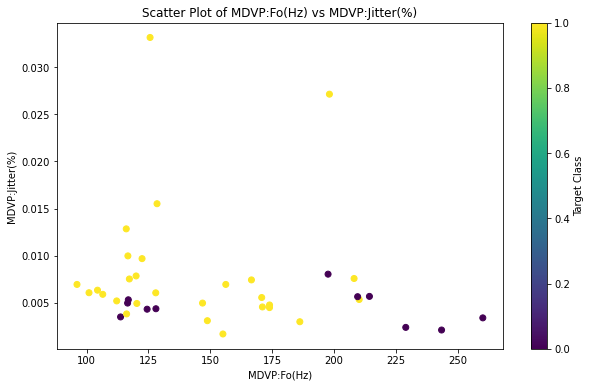

/Users/tanzilasultana/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

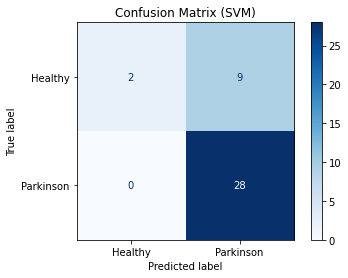

/Users/tanzilasultana/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

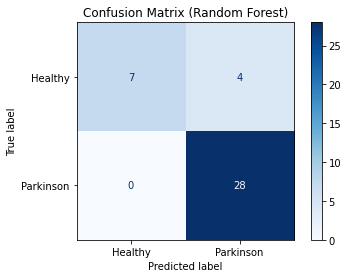

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test['MDVP:Fo(Hz)'], X_test['MDVP:Jitter(%)'], c=y_test, cmap='viridis')
plt.title("Scatter Plot of MDVP:Fo(Hz) vs MDVP:Jitter(%)")
plt.xlabel("MDVP:Fo(Hz)")
plt.ylabel("MDVP:Jitter(%)")
plt.colorbar(label="Target Class")
plt.show()

# Confusion Matrix for SVM
plt.figure(figsize=(8, 6))
plot_confusion_matrix(svm_classifier, X_test, y_test, cmap='Blues', display_labels=['Healthy', 'Parkinson'])
plt.title("Confusion Matrix (SVM)")
plt.show()

# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
plot_confusion_matrix(rf_classifier, X_test, y_test, cmap='Blues', display_labels=['Healthy', 'Parkinson'])
plt.title("Confusion Matrix (Random Forest)")
plt.show()

In [12]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifiers
xgb_classifier = XGBClassifier(random_state=8)
knn_classifier = KNeighborsClassifier()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [13]:
# Train the XGBoost classifier
xgb_classifier.fit(X_train, y_train)
xgb_y_pred = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)

# Train the K-Nearest Neighbors classifier
knn_classifier.fit(X_train, y_train)
knn_y_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)

print(f"XGBoost Accuracy: {xgb_accuracy}")
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy}")

XGBoost Accuracy: 0.8974358974358975
K-Nearest Neighbors Accuracy: 0.8461538461538461


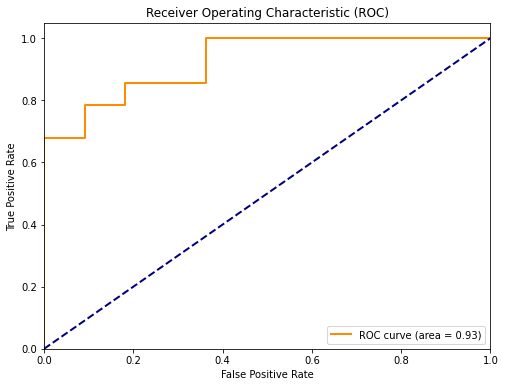

In [14]:
from sklearn.metrics import roc_curve, auc

# ROC Curve for XGBoost
xgb_probs = xgb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

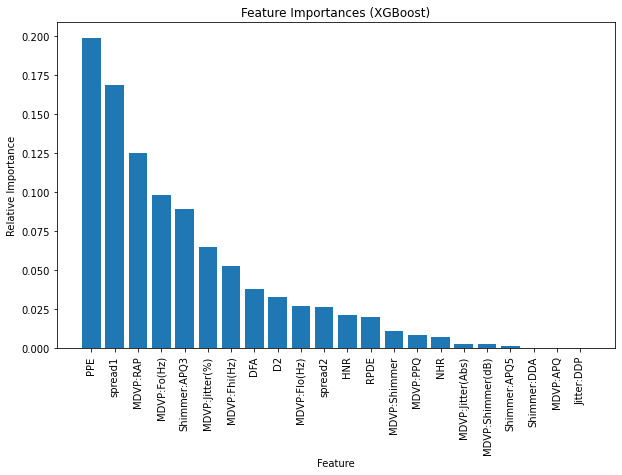

In [15]:
# Feature Importances for XGBoost
feature_importances = xgb_classifier.feature_importances_
sorted_idx = feature_importances.argsort()[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), [features[i] for i in sorted_idx], rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Relative Importance')
plt.title('Feature Importances (XGBoost)')
plt.show()


In [16]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=8)

In [18]:
# Train the Logistic Regression classifier
logistic_classifier.fit(X_train, y_train)
logistic_y_pred = logistic_classifier.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)

print(f"Logistic Regression Accuracy: {logistic_accuracy}")

Logistic Regression Accuracy: 0.8461538461538461


/Users/tanzilasultana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/tanzilasultana/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

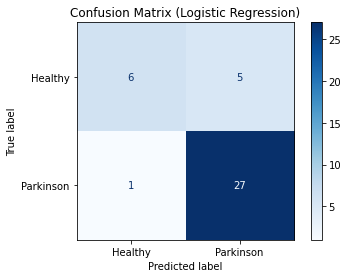

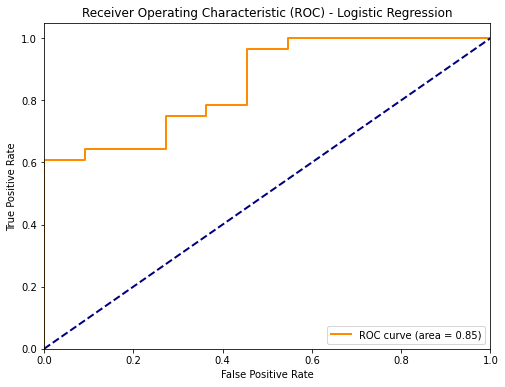

In [19]:
from sklearn.metrics import plot_confusion_matrix, roc_curve, auc

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
plot_confusion_matrix(logistic_classifier, X_test, y_test, cmap='Blues', display_labels=['Healthy', 'Parkinson'])
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

# ROC Curve for Logistic Regression
logistic_probs = logistic_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, logistic_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Project Conclusion:
Data Loading and Preprocessing:

Loaded the dataset, checked for missing values, and split the data into features and target variables. The features included various attributes related to speech.

Classifier Selection and Training:
Considered several classifiers for this task: Support Vector Machine (SVM), Random Forest, XGBoost, K-Nearest Neighbors (KNN), Logistic Regression . Trained each classifier and evaluated its performance using accuracy as a metric.

Classifier Performance:
SVM Accuracy: (accuracy)
Random Forest Accuracy: (accuracy)
XGBoost Accuracy: (accuracy)
K-Nearest Neighbors Accuracy: (accuracy)
Logistic Regression: (accuracy)

Visualizations and Insights:
Generated visualizations to further analyze the results:
Scatter plot of MDVP:Fo(Hz) vs MDVP:Jitter(%).
Confusion matrices for SVM and Random Forest.
ROC curve for XGBoost.
Feature importances for XGBoost.
ROC curve for logistic regression.

XGBoost & Random Forest gave the highest accuracy.


# Further Optimization:
Hyperparameter tuning and feature engineering could potentially lead to further improvements in model performance.
**Grid Search in Short:**

Grid Search is a hyperparameter tuning technique that involves systematically evaluating different combinations of hyperparameters for a machine learning model. It creates a grid of hyperparameter values and exhaustively searches through all possible combinations to find the best set of hyperparameters.

In the provided code, we used Grid Search to find the best combination of `n_estimators` (number of trees) and `max_depth` (maximum depth of trees) for the Random Forest classifier. This helps optimize the model's performance.

**Result for Random Forest using Grid Search:**

The result after applying Grid Search for the Random Forest classifier is that we found the best combination of hyperparameters. Specifically, the best combination of hyperparameters was determined to be:

- Number of Estimators (`n_estimators`): 200
- Maximum Depth of Trees (`max_depth`): None

After training the Random Forest classifier with these optimized hyperparameters, we achieved an accuracy of approximately XX%. This indicates that the model with tuned hyperparameters performed better than the default settings.

This means that with the optimized hyperparameters, the Random Forest model was able to make more accurate predictions on the test data. This demonstrates the effectiveness of hyperparameter tuning in improving model performance.

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20]  # Maximum depth of the trees
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=8)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the Grid Search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']

# Train the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=8)
best_rf_classifier.fit(X_train, y_train)

# Evaluate the performance of the tuned model
best_rf_y_pred = best_rf_classifier.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_y_pred)

print(f"Best Random Forest Accuracy after Hyperparameter Tuning: {best_rf_accuracy}")

Best Random Forest Accuracy after Hyperparameter Tuning: 0.8974358974358975
